In [1]:
conda install -c conda-forge ipython-sql=0.3.6

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed

Note: you may need to restart the kernel to use updated packages.



Examining ipython-sql=0.3.6:  80%|########  | 4/5 [00:00<00:00,  6.44it/s]             
                                                                          

Examining conflict for python ipython-sql:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                                

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - ipython-sql=0.3.6 -> python[version='2.7.*|3.5.*|3.6.*|3.4.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [2]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in c:\users\rholm\anaconda3\lib\site-packages (1.1.1)
Requirement already up-to-date: scipy in c:\users\rholm\anaconda3\lib\site-packages (1.8.1)
Requirement already up-to-date: matplotlib in c:\users\rholm\anaconda3\lib\site-packages (3.5.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from zipfile import ZipFile

# The provided password needs to be entered in the cell below

In [4]:
# Replace the word 'enterhere' below with the provided password.
password = b'enterhere'
z = ZipFile('winequality.zip')
wine_file = z.extract('winequality.csv', pwd=password)
z.close()

In [5]:
# Import dataset
df = pd.read_csv('winequality.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
con = sqlite3.connect('wine.db')
c = con.cursor()

In [8]:
try:
    df.to_sql('wine',con)
except ValueError:
    pass

C:\Users\rholm\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


## Enter SQL modifications here
### If actual changes are needed to the database such as cleaning enter here.
### If the data needs to be explored, enter changes several cells down.

In [9]:
# If modifications are needed to the sql database make them here.
sql_command = """
SELECT * FROM wine LIMIT 5
"""

c.execute(sql_command)
con.commit()

In [10]:
%load_ext sql

In [11]:
%sql sqlite:///wine.db

## Enter SQL commands below for data exploration
### If further changes are needed, execute sql commands above.

In [12]:
%%sql

SELECT * FROM wine
WHERE quality>=7
ORDER BY quality DESC

 * sqlite:///wine.db
Done.


index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.07200000000000001,6.0,29.0,0.9987,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8
481,9.4,0.3,0.56,2.8,0.08,6.0,17.0,0.9964,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.07,5.0,16.0,0.9972,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.07,5.0,16.0,0.9972,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


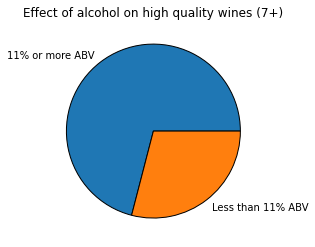

In [13]:
c.execute("SELECT alcohol FROM wine WHERE quality >= 7 ORDER BY quality DESC")
rows = c.fetchall()
quantity = len(rows)
found = 0

for row in rows:
    alcohol = row[0]
    if alcohol >= 11:
        found += 1

remaining = quantity - found
slices = [found, remaining]
labels = ['11% or more ABV', 'Less than 11% ABV']
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'})

plt.title("Effect of alcohol on high quality wines (7+)")
plt.show()

In [14]:
c.execute("SELECT * FROM wine ORDER BY quality DESC LIMIT 5")
wines = c.fetchall()

def average(item):
    return sum(item)/len(item)

top_5_fixed_acidity = []
top_5_volatile_acidity = []
top_5_citric_acid = []
top_5_residual_sugar = []
top_5_chlorides = []
top_5_free_sulfur_dioxide = []
top_5_total_sulfur_dioxide = []
top_5_density = []
top_5_pH = []
top_5_sulphates = []
top_5_alcohol = []

# Strip out index and quality
for wine in wines:
    top_5_fixed_acidity.append(wine[1])
    top_5_volatile_acidity.append(wine[2])
    top_5_citric_acid.append(wine[3])
    top_5_residual_sugar.append(wine[4])
    top_5_chlorides.append(wine[5])
    top_5_free_sulfur_dioxide.append(wine[6])
    top_5_total_sulfur_dioxide.append(wine[7])
    top_5_density.append(wine[8])
    top_5_pH.append(wine[9])
    top_5_sulphates.append(wine[10])
    top_5_alcohol.append(wine[11])


top_5 = []
top_5.append(average(top_5_fixed_acidity))
top_5.append(average(top_5_volatile_acidity))
top_5.append(average(top_5_citric_acid))
top_5.append(average(top_5_residual_sugar))
top_5.append(average(top_5_chlorides))
top_5.append(average(top_5_free_sulfur_dioxide))
top_5.append(average(top_5_total_sulfur_dioxide))
top_5.append(average(top_5_density))
top_5.append(average(top_5_pH))
top_5.append(average(top_5_sulphates))
top_5.append(average(top_5_alcohol))

print(wines[0])
print(wines[1])
print(wines[2])
print(top_5)


(267, 7.9, 0.35, 0.46, 3.6, 0.078, 15.0, 37.0, 0.9973, 3.35, 0.86, 12.8, 8)
(278, 10.3, 0.32, 0.45, 6.4, 0.073, 5.0, 13.0, 0.9976, 3.23, 0.82, 12.6, 8)
(390, 5.6, 0.85, 0.05, 1.4, 0.045, 12.0, 88.0, 0.9924, 3.56, 0.82, 12.9, 8)
[9.540000000000001, 0.49000000000000005, 0.47000000000000003, 3.7600000000000002, 0.0708, 8.8, 37.2, 0.99696, 3.2479999999999998, 0.8019999999999999, 12.299999999999999]


In [15]:
# Data should be explored and modified as needed. Closing connection.
con.close()

<BarContainer object of 11 artists>

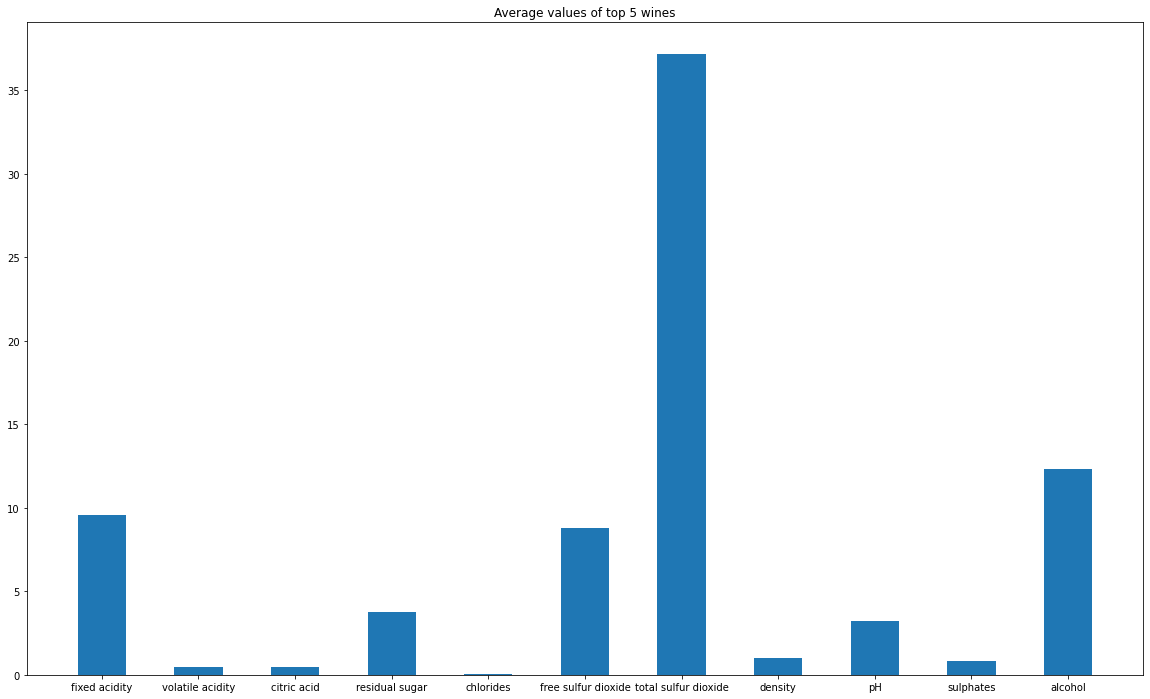

In [16]:
attributes = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

ypos = np.arange(len(attributes))
fig = plt.figure(1, [20,12])

plt.xticks(ypos, attributes)
plt.title("Average values of top 5 wines")
plt.bar(ypos, top_5, width=0.5)

In [17]:
f_acid=df['fixed acidity'].values
v_acid=df['volatile acidity'].values
residual_sugar=df['residual sugar'].values
sulphates=df['sulphates'].values
quality=df['quality'].values

Text(0.5, 1.0, 'Contribution of Fixed Acidity to Quality')

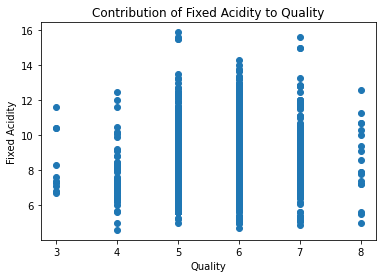

In [18]:
plt.scatter(quality,f_acid)
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Contribution of Fixed Acidity to Quality')

Text(0.5, 1.0, 'Contribution of Volatile Acidity to Quality')

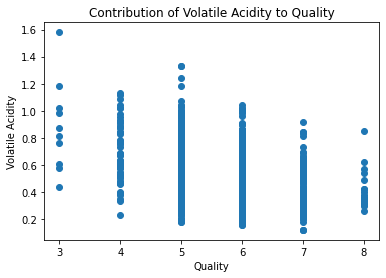

In [19]:
plt.scatter(quality,v_acid)
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Contribution of Volatile Acidity to Quality')

Text(0.5, 1.0, 'Contribution of Residual Sugar to Quality')

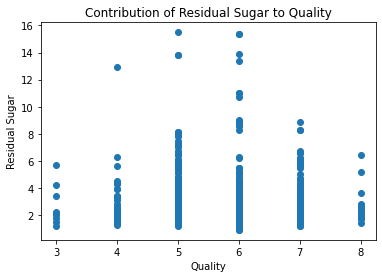

In [20]:
plt.scatter(quality,residual_sugar)
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Contribution of Residual Sugar to Quality')

Text(0.5, 1.0, 'Contribution of Sulphates to Quality')

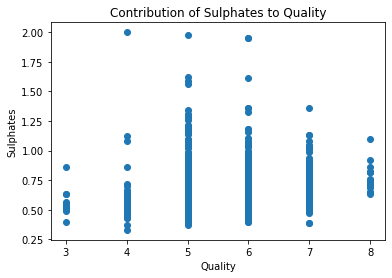

In [21]:
plt.scatter(quality,sulphates)
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.title('Contribution of Sulphates to Quality')

In [22]:
x=df.drop(['quality'],axis=1).values
y=df['quality'].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=0)

In [24]:
# This block contains various regression models. The first comment in a section is the name of the model.
# Everything that follows is the code for the model. Leave one method uncommented, the rest commented out and run this block.
# The actual model name such as "Linear Regression" or "Bayesian Ridge" should remain commented out.

# Linear Regression
# from sklearn.linear_model import LinearRegression
# reg=LinearRegression()
# reg.fit(x_train,y_train)

# Ridge
from sklearn.linear_model import Ridge
reg=Ridge()
reg.fit(x_train,y_train)

# Bayesian Ridge
# from sklearn.linear_model import BayesianRidge
# reg=BayesianRidge()
# reg.fit(x_train,y_train)

# Lasso
# from sklearn.linear_model import Lasso
# reg=Lasso()
# reg.fit(x_train,y_train)

# LARS Lasso
# from sklearn.linear_model import LassoLars
# reg=LassoLars()
# reg.fit(x_train,y_train)

# Perceptron
# from sklearn.linear_model import Perceptron
# reg=Perceptron()
# reg.fit(x_train,y_train)

# Elastic Net
# from sklearn.linear_model import ElasticNet
# reg=ElasticNet()
# reg.fit(x_train,y_train)

# Lars
# from sklearn.linear_model import Lars
# reg=Lars()
# reg.fit(x_train,y_train)

Ridge()

In [25]:
y_pred=reg.predict(x_test)
y_round = np.round(y_pred)

In [37]:
# This interace predicts the quality of the wine product. Tweak the variables below and run this cell.
# The ml.predict function then takes these variables and outputs a predicted wine quality.

fixed_acidity = 10.3
volatile_acidity = 0.32
citric_acid = 0.45
residual_sugar = 6.4
chlorides = 0.073
free_sulfur_dioxide = 5.0
total_sulfur_dioxide = 13.0
density = 0.9976
pH = 3.23
sulphates = 0.82
alcohol = 12.6


reg.predict([[
    fixed_acidity, 
    volatile_acidity, 
    citric_acid, 
    residual_sugar, 
    chlorides, 
    free_sulfur_dioxide, 
    total_sulfur_dioxide, 
    density, 
    pH,
    sulphates, 
    alcohol]])

array([6.92072506])

In [34]:
# Evaluation of prediction via RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test,y_pred))
print(RMSE)

0.6524564468005855
